In [1]:
import pandas as pd
import numpy as np; np.random.seed(7)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Dense, Activation
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
from sklearn.utils.class_weight import compute_class_weight
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv('../data/BipolarDerivedDataTraining.csv')
test = pd.read_csv('../data/BipolarDerivedDataTesting.csv')

cols = 'age|gender|handedness|t1r.*'
col_dict = {'Age': 'age', 'Sex': 'gender', 'Hand': 'handedness'}
case_dict = {'Case': 1, 'Control': 0}

y_madrs = train.loc[:, 'madrs_score']
y_ymrs = train.loc[:, 'ymrs_score']
y_bp = train.loc[:, 'group']

record_id = test.loc[:, 'record_id']

In [3]:
y_bp = y_bp.replace(case_dict)
test = test.rename(columns=col_dict)

train = train.filter(regex=cols)
test = test.filter(items=list(train.columns))
train = train.filter(items=list(test.columns))

train = train.fillna(train.median().to_dict())
test = test.fillna(train.median().to_dict())

In [4]:
print(train.shape, test.shape, len(record_id))

(88, 359) (39, 359) 39


In [78]:
def create_model(dropout, name):
    if name == 'b':
        model = Sequential()
        model.add(Dense(train.shape[1], input_shape=(train.shape[1],)))
#         model.add(Activation('relu'))
        model.add(Dense(20))
        model.add(Dense(1))
#         model.add(Activation('softmax'))
    elif name == 'm':
        model = Sequential()
        model.add(Dense(train.shape[1], input_shape=(train.shape[1],)))
#         model.add(Activation('relu'))
        model.add(Dense(20))
        model.add(Dense(1))
    elif name == 'y':
        model = Sequential()
        model.add(Dense(train.shape[1], input_shape=(train.shape[1],)))
        model.add(Dense(20))
        model.add(Dense(1))

    model.compile(loss='mse',optimizer=Adam(lr=.1), metrics=['mae'])
    
    return model


def scale_y(y_col):
    y_col = y_col.values.reshape(-1, 1)
    scaler = MinMaxScaler(feature_range=(-1,1))
    scaler.fit(y_col)
    return pd.DataFrame(scaler.transform(y_col)), scaler

In [6]:
onehot = OneHotEncoder()
onehot.fit(train.iloc[:, 1:3])
train_cat = pd.DataFrame(onehot.transform(train.iloc[:, 1:3]).todense())
test_cat = pd.DataFrame(onehot.transform(test.iloc[:, 1:3]).todense())
train = pd.concat([train.drop(['gender', 'handedness'], axis=1), train_cat], axis=1)
test = pd.concat([test.drop(['gender', 'handedness'], axis=1), test_cat], axis=1)

In [7]:
scaler = MinMaxScaler(feature_range=(-1,1))
scaler.fit(train)
train = scaler.transform(train)
test = scaler.transform(test)

In [36]:
model_bp = create_model(0.3, 'b')
target_bp, scaler_bp = scale_y(y_bp)

In [ ]:
model_ymrs = create_model(0.3, 'm')

In [79]:
model_madrs = create_model(0.3, 'y')

In [37]:
history = model_bp.fit(train, target_bp, batch_size=5,
                       epochs=100, validation_split=0.1)

Train on 79 samples, validate on 9 samples
Epoch 1/100
79/79 [==============================] - 1s 9ms/sample - loss: 248957.7885 - mae: 299.3065 - val_loss: 155380.3611 - val_mae: 377.1814
Epoch 2/100
79/79 [==============================] - 0s 1ms/sample - loss: 39907.6561 - mae: 157.2288 - val_loss: 3566.7668 - val_mae: 49.6447
Epoch 3/100
79/79 [==============================] - 0s 1ms/sample - loss: 3438.9234 - mae: 46.5791 - val_loss: 3808.2512 - val_mae: 58.8476
Epoch 4/100
79/79 [==============================] - 0s 726us/sample - loss: 2806.1884 - mae: 43.9998 - val_loss: 79.0214 - val_mae: 7.5906
Epoch 5/100
79/79 [==============================] - 0s 813us/sample - loss: 1089.0434 - mae: 28.1705 - val_loss: 42.3729 - val_mae: 6.1382
Epoch 6/100
79/79 [==============================] - 0s 1ms/sample - loss: 1434.3040 - mae: 31.0847 - val_loss: 752.9815 - val_mae: 26.2484
Epoch 7/100
79/79 [==============================] - 0s 1ms/sample - loss: 549.1195 - mae: 18.9326 - val_l

Epoch 61/100
79/79 [==============================] - 0s 1ms/sample - loss: 0.9429 - mae: 0.8549 - val_loss: 2.0900 - val_mae: 1.4399
Epoch 62/100
79/79 [==============================] - 0s 1ms/sample - loss: 0.9086 - mae: 0.7465 - val_loss: 2.5883 - val_mae: 1.5876
Epoch 63/100
79/79 [==============================] - 0s 1ms/sample - loss: 0.8953 - mae: 0.8293 - val_loss: 2.0586 - val_mae: 1.4141
Epoch 64/100
79/79 [==============================] - 0s 1ms/sample - loss: 0.8275 - mae: 0.7750 - val_loss: 2.3904 - val_mae: 1.5399
Epoch 65/100
79/79 [==============================] - 0s 1ms/sample - loss: 0.8191 - mae: 0.7855 - val_loss: 2.4516 - val_mae: 1.5254
Epoch 66/100
79/79 [==============================] - 0s 936us/sample - loss: 1.1367 - mae: 0.8671 - val_loss: 3.0948 - val_mae: 1.6398
Epoch 67/100
79/79 [==============================] - 0s 1ms/sample - loss: 1.7987 - mae: 0.9880 - val_loss: 2.7753 - val_mae: 1.6252
Epoch 68/100
79/79 [==============================] - 0s 1ms

Text(0, 0.5, 'mae loss')

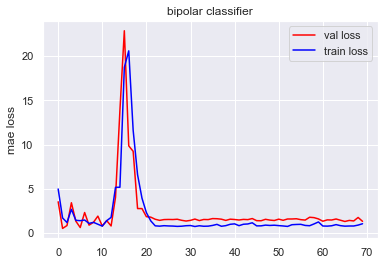

In [38]:
val_loss = history.history['val_mae'][30:]
trn_loss = history.history['mae'][30:]
sns.lineplot(x=range(0,len(val_loss)), y=val_loss, color='red')
sns.lineplot(x=range(0, len(trn_loss)), y=trn_loss, color='blue')
plt.legend(labels=['val loss', 'train loss'])
plt.title('bipolar classifier')
plt.ylabel('mae loss')

In [80]:
history_madrs = model_madrs.fit(train, y_madrs, batch_size=88,
                       epochs=120, validation_split=0.1)

Train on 79 samples, validate on 9 samples
Epoch 1/120
79/79 [==============================] - 1s 8ms/sample - loss: 237.8451 - mae: 11.7696 - val_loss: 80288.3203 - val_mae: 277.5381
Epoch 2/120
79/79 [==============================] - 0s 308us/sample - loss: 82183.6875 - mae: 273.7296 - val_loss: 4244402.0000 - val_mae: 2018.9283
Epoch 3/120
79/79 [==============================] - 0s 264us/sample - loss: 4763610.5000 - mae: 2084.2383 - val_loss: 181204.5469 - val_mae: 417.4092
Epoch 4/120
79/79 [==============================] - 0s 411us/sample - loss: 211429.4219 - mae: 438.8059 - val_loss: 87423.9922 - val_mae: 289.4390
Epoch 5/120
79/79 [==============================] - 0s 323us/sample - loss: 89887.3359 - mae: 286.4651 - val_loss: 116569.3203 - val_mae: 334.3256
Epoch 6/120
79/79 [==============================] - 0s 347us/sample - loss: 120709.0234 - mae: 331.9390 - val_loss: 4071.2795 - val_mae: 62.0206
Epoch 7/120
79/79 [==============================] - 0s 389us/sample - l

Epoch 57/120
79/79 [==============================] - 0s 228us/sample - loss: 127.7550 - mae: 8.1998 - val_loss: 1482.3240 - val_mae: 37.4945
Epoch 58/120
79/79 [==============================] - 0s 210us/sample - loss: 965.9731 - mae: 28.8827 - val_loss: 2703.7473 - val_mae: 50.7383
Epoch 59/120
79/79 [==============================] - 0s 398us/sample - loss: 2013.8228 - mae: 42.4035 - val_loss: 1423.9766 - val_mae: 36.7643
Epoch 60/120
79/79 [==============================] - 0s 367us/sample - loss: 912.6376 - mae: 28.0253 - val_loss: 62.7139 - val_mae: 7.4311
Epoch 61/120
79/79 [==============================] - 0s 317us/sample - loss: 82.8943 - mae: 7.3896 - val_loss: 306.3575 - val_mae: 17.2405
Epoch 62/120
79/79 [==============================] - 0s 355us/sample - loss: 933.3148 - mae: 27.9799 - val_loss: 527.4778 - val_mae: 22.6012
Epoch 63/120
79/79 [==============================] - 0s 171us/sample - loss: 1307.1552 - mae: 33.5032 - val_loss: 57.2489 - val_mae: 7.3752
Epoch 64

Epoch 116/120
79/79 [==============================] - 0s 357us/sample - loss: 52.9593 - mae: 6.3001 - val_loss: 185.6844 - val_mae: 12.8662
Epoch 117/120
79/79 [==============================] - 0s 329us/sample - loss: 55.9627 - mae: 6.4976 - val_loss: 166.7039 - val_mae: 12.1316
Epoch 118/120
79/79 [==============================] - 0s 351us/sample - loss: 52.8303 - mae: 6.2947 - val_loss: 127.9045 - val_mae: 10.4725
Epoch 119/120
79/79 [==============================] - 0s 268us/sample - loss: 50.7134 - mae: 5.9691 - val_loss: 102.9153 - val_mae: 9.2456
Epoch 120/120
79/79 [==============================] - 0s 192us/sample - loss: 53.1588 - mae: 5.8751 - val_loss: 105.0475 - val_mae: 9.3536


Text(0, 0.5, 'mae loss')

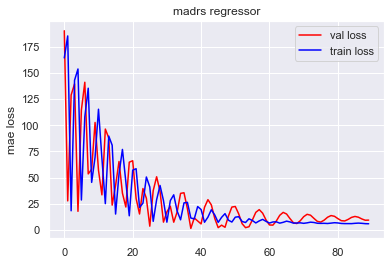

In [81]:
val_loss_madrs = history_madrs.history['val_mae'][30:]
trn_loss_madrs = history_madrs.history['mae'][30:]
sns.lineplot(x=range(0,len(val_loss_madrs)), y=val_loss_madrs, color='red')
sns.lineplot(x=range(0, len(trn_loss_madrs)), y=trn_loss_madrs, color='blue')
plt.legend(labels=['val loss', 'train loss'])
plt.title('madrs regressor')
plt.ylabel('mae loss')

In [13]:
history_ymrs = model_ymrs.fit(train, y_ymrs, batch_size=5,
                       epochs=100, validation_split=0.1)

Train on 79 samples, validate on 9 samples
Epoch 1/100
79/79 [==============================] - 1s 14ms/sample - loss: 474170.1918 - mae: 365.3319 - val_loss: 349156.3160 - val_mae: 573.2562
Epoch 2/100
79/79 [==============================] - 0s 1ms/sample - loss: 117270.1603 - mae: 272.4115 - val_loss: 23108.0404 - val_mae: 142.6285
Epoch 3/100
79/79 [==============================] - 0s 1ms/sample - loss: 11501.0306 - mae: 83.7429 - val_loss: 2001.1697 - val_mae: 42.9759
Epoch 4/100
79/79 [==============================] - 0s 1ms/sample - loss: 896.6702 - mae: 23.0754 - val_loss: 93.8577 - val_mae: 8.1554
Epoch 5/100
79/79 [==============================] - 0s 1ms/sample - loss: 186.1068 - mae: 11.0065 - val_loss: 28.7844 - val_mae: 4.7631
Epoch 6/100
79/79 [==============================] - 0s 1ms/sample - loss: 72.6374 - mae: 6.3261 - val_loss: 8.5854 - val_mae: 2.3894
Epoch 7/100
79/79 [==============================] - 0s 971us/sample - loss: 46.3432 - mae: 5.2341 - val_loss: 2.

79/79 [==============================] - 0s 2ms/sample - loss: 24.4735 - mae: 3.8862 - val_loss: 41.9965 - val_mae: 6.1060
Epoch 61/100
79/79 [==============================] - 0s 1ms/sample - loss: 6.2865 - mae: 2.0425 - val_loss: 33.3824 - val_mae: 5.0942
Epoch 62/100
79/79 [==============================] - 0s 1ms/sample - loss: 6.4201 - mae: 2.0121 - val_loss: 22.5110 - val_mae: 4.1738
Epoch 63/100
79/79 [==============================] - 0s 1ms/sample - loss: 5.6133 - mae: 1.8185 - val_loss: 11.9196 - val_mae: 3.1262
Epoch 64/100
79/79 [==============================] - 0s 1ms/sample - loss: 10.0514 - mae: 2.4851 - val_loss: 42.1068 - val_mae: 6.0954
Epoch 65/100
79/79 [==============================] - ETA: 0s - loss: 12.7167 - mae: 2.90 - 0s 1ms/sample - loss: 10.9505 - mae: 2.6083 - val_loss: 34.4862 - val_mae: 5.5929
Epoch 66/100
79/79 [==============================] - 0s 1ms/sample - loss: 6.9186 - mae: 2.1170 - val_loss: 26.2621 - val_mae: 4.7334
Epoch 67/100
79/79 [=======

Text(0, 0.5, 'mae loss')

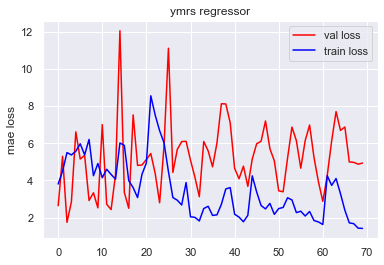

In [32]:
val_loss_ymrs = history_ymrs.history['val_mae'][30:]
trn_loss_ymrs = history_ymrs.history['mae'][30:]
sns.lineplot(x=range(0,len(val_loss_ymrs)), y=val_loss_ymrs, color='red')
sns.lineplot(x=range(0, len(trn_loss_ymrs)), y=trn_loss_ymrs, color='blue')
plt.legend(labels=['val loss', 'train loss'])
plt.title('ymrs regressor')
plt.ylabel('mae loss')

In [82]:
raw_bp_pred = model_bp.predict(test)
bp_pred = scaler_bp.inverse_transform(raw_bp_pred)

raw_madrs_pred = model_madrs.predict(test)

raw_ymrs_pred = model_ymrs.predict(test)

print(bp_pred, raw_madrs_pred, raw_ymrs_pred)

[[0.8840238 ]
 [0.63107395]
 [1.0761964 ]
 [0.6757015 ]
 [0.70600224]
 [0.43715408]
 [0.9786489 ]
 [0.28194892]
 [1.4231235 ]
 [0.8918431 ]
 [1.0653253 ]
 [0.52901846]
 [0.83790106]
 [0.77511233]
 [0.39420286]
 [0.6779721 ]
 [1.0237269 ]
 [0.5002351 ]
 [0.5700697 ]
 [0.37212372]
 [0.6673174 ]
 [0.4811311 ]
 [0.63552296]
 [0.86605793]
 [0.66394645]
 [1.0870413 ]
 [0.9327272 ]
 [0.9019909 ]
 [0.6788256 ]
 [0.6940004 ]
 [0.8829508 ]
 [0.7719922 ]
 [0.9624221 ]
 [0.4632442 ]
 [0.45059812]
 [0.804958  ]
 [0.43429565]
 [0.33477792]
 [1.1005821 ]] [[13.628245 ]
 [15.846293 ]
 [ 6.268997 ]
 [ 2.8633225]
 [ 8.830165 ]
 [ 6.6171827]
 [ 8.619334 ]
 [ 6.0592756]
 [10.35229  ]
 [ 5.156108 ]
 [11.935191 ]
 [12.637462 ]
 [ 9.95576  ]
 [12.583461 ]
 [ 9.667644 ]
 [17.580914 ]
 [ 8.227138 ]
 [11.804423 ]
 [10.816386 ]
 [ 6.349574 ]
 [10.018554 ]
 [10.930034 ]
 [14.169322 ]
 [12.082835 ]
 [11.806178 ]
 [17.828747 ]
 [13.667918 ]
 [10.178447 ]
 [12.180766 ]
 [13.056743 ]
 [ 7.992305 ]
 [13.010661 ]
 [ 9.

0.5128205128205128


[Text(0, 0.5, 'pred ymrs')]

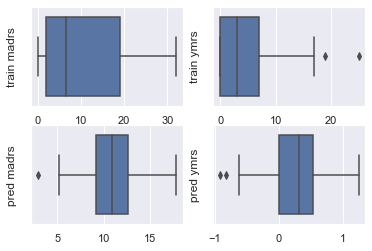

In [87]:
pred_b = []
for ele in bp_pred:
    if ele > .68:
        pred_b.append("Case")
    else:
        pred_b.append("Control")
print(pred_b.count("Case")/len(pred_b))

f, axes = plt.subplots(2,2)
sns.boxplot(check.loc[:, 'madrs_score'], ax=axes[0][0]).set(ylabel='train madrs')
sns.boxplot(check.loc[:, 'ymrs_score'], ax=axes[0][1]).set(ylabel='train ymrs')
sns.boxplot(pd.DataFrame(raw_madrs_pred), ax=axes[1][0]).set(ylabel='pred madrs')
sns.boxplot(pd.DataFrame(raw_ymrs_pred), ax=axes[1][1]).set(ylabel='pred ymrs')

In [84]:
model_bp.save('zkhan1-bp_pred.keras')
model_madrs.save('zkhan1-madrs_pred.keras')
model_ymrs.save('zkhan1-ymrs_pred.keras')

In [93]:
# Final output prediction processing
ymrs = [x if x>0 else 0 for x in list(raw_ymrs_pred.squeeze())]
print(list(zip(record_id, ymrs)))

madrs = list(raw_madrs_pred.squeeze())
print(list(zip(record_id, madrs)))

bp = [1 if ele>.68 else 0 for ele in bp_pred]
print(list(zip(record_id, bp)))

[(1188, 0.84356314), (1248, 0.721935), (1197, 0), (1608, 0.024255171), (1987, 0.50183), (1729, 0.43025357), (1222, 0.31003922), (1063, 0.18101293), (1993, 0), (1028, 0.46382746), (1288, 0.21460015), (1192, 0.46482435), (1674, 0), (1699, 0.56541157), (1821, 0), (1947, 0), (1632, 0), (1089, 0.09241293), (1444, 0), (1340, 0.48991656), (1811, 0.029155672), (1485, 0.65426654), (1259, 1.2440121), (1687, 0.37948725), (1441, 0), (2003, 0.46881688), (1114, 0.70169735), (1503, 0.64428186), (1921, 0.110060036), (1492, 0.28837472), (1894, 0.7496892), (1968, 0.1478264), (1186, 0), (2001, 0), (1551, 0.082907856), (1100, 1.2329715), (1525, 0.48196146), (2021, 1.0359281), (1296, 0.5069582)]
[(1188, 13.628245), (1248, 15.846293), (1197, 6.268997), (1608, 2.8633225), (1987, 8.830165), (1729, 6.6171827), (1222, 8.619334), (1063, 6.0592756), (1993, 10.35229), (1028, 5.156108), (1288, 11.935191), (1192, 12.637462), (1674, 9.95576), (1699, 12.583461), (1821, 9.667644), (1947, 17.580914), (1632, 8.227138), (

In [95]:
df_results = pd.DataFrame()

df_results['ID'] = record_id
df_results['case_control'] = bp
df_results['YMRS'] = ymrs
df_results['MADRS'] = madrs

print(df_results)

df_results.to_csv('zkhan1-bp_hackathon_submission.txt')

      ID  case_control      YMRS      MADRS
0   1188             1  0.843563  13.628245
1   1248             0  0.721935  15.846293
2   1197             1  0.000000   6.268997
3   1608             0  0.024255   2.863322
4   1987             1  0.501830   8.830165
5   1729             0  0.430254   6.617183
6   1222             1  0.310039   8.619334
7   1063             0  0.181013   6.059276
8   1993             1  0.000000  10.352290
9   1028             1  0.463827   5.156108
10  1288             1  0.214600  11.935191
11  1192             0  0.464824  12.637462
12  1674             1  0.000000   9.955760
13  1699             1  0.565412  12.583461
14  1821             0  0.000000   9.667644
15  1947             0  0.000000  17.580914
16  1632             1  0.000000   8.227138
17  1089             0  0.092413  11.804423
18  1444             0  0.000000  10.816386
19  1340             0  0.489917   6.349574
20  1811             0  0.029156  10.018554
21  1485             0  0.654267